In [1]:
#!/usr/bin/env python3 

In [1]:
# Importing the necessary modules 
import matplotlib.pyplot as plt 
import supervision as sv 
import cv2
from ultralytics import YOLO
import torch 
from IPython.display import Image

In [2]:
# Optional: Check if a GPU is available (recommended for faster training)
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU not found. Training on CPU (will be slower).")

# Load and download the yolo model 
model = YOLO('yolov8s.pt') 

GPU not found. Training on CPU (will be slower).


In [3]:
# Setting the path to the trained model 
bestModelPath = "model/best.pt"

# loading the model 
trainedModel = YOLO(bestModelPath)

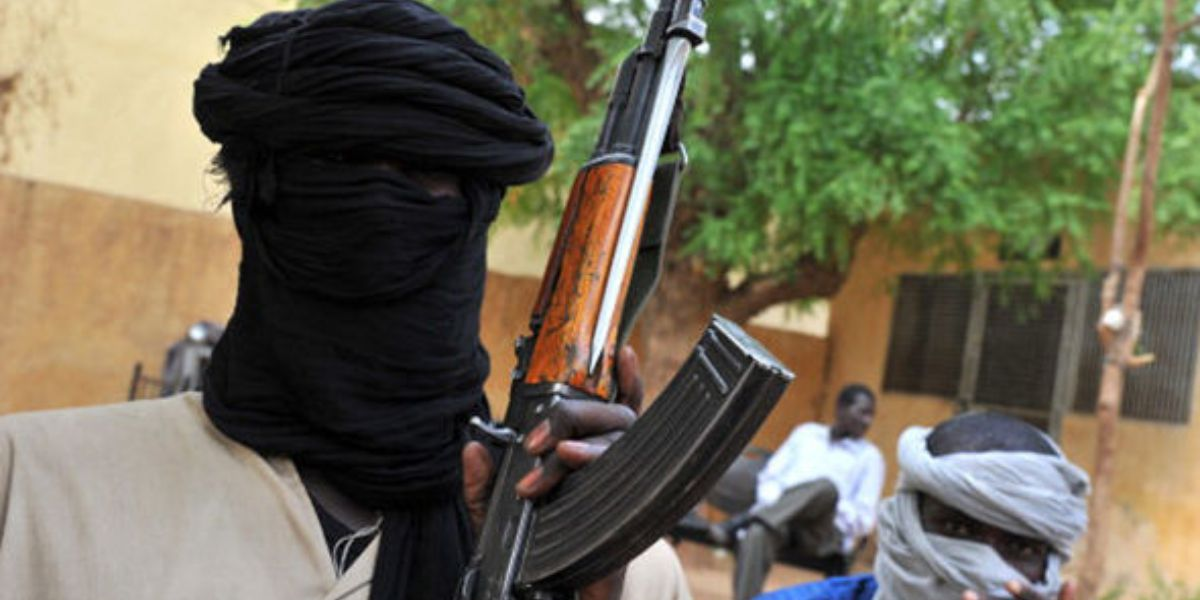

In [4]:
# Setting the path to the image 
imagePath = "images/train/img30.jpg" 

# Displaying the bandits image
Image(filename=imagePath, width=800)

In [5]:
image = cv2.imread(imagePath)

# Getting the results 
results = trainedModel(image)[0]

# 
detections = sv.Detections.from_ultralytics(results) 

# 
box_annotator = sv.BoxAnnotator() 
label_annotator = sv.LabelAnnotator() 


0: 320x640 2 banditss, 1 gun, 1 unknown, 303.2ms
Speed: 6.8ms preprocess, 303.2ms inference, 4.1ms postprocess per image at shape (1, 3, 320, 640)


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [6]:
labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence 
    in zip(detections['class_name'], detections.confidence)
]

In [7]:
detections["class_name"] 

array(['bandits', 'unknown', 'gun', 'bandits'], dtype='<U7')

In [8]:
detections.confidence

array([    0.95356,      0.9434,     0.94091,     0.93969], dtype=float32)

In [9]:
for className, confidence in zip(detections["class_name"], detections.confidence): 
    # Checking 
    if (className == "bandits"): 
        print(f"Bandits Detected! with a percentage accuracy of {confidence * 100}") 
        
    print(className, confidence) 

Bandits Detected! with a percentage accuracy of 95.3555703163147
bandits 0.9535557
unknown 0.9433969
gun 0.9409097
Bandits Detected! with a percentage accuracy of 93.9694344997406
bandits 0.93969434


In [10]:
annotated_image = box_annotator.annotate(
    scene=image, detections=detections)

annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels) 

In [11]:
cv2.imwrite("annotatedImage.jpg", annotated_image)

True

In [12]:
labels

['bandits 0.95', 'unknown 0.94', 'gun 0.94', 'bandits 0.94']

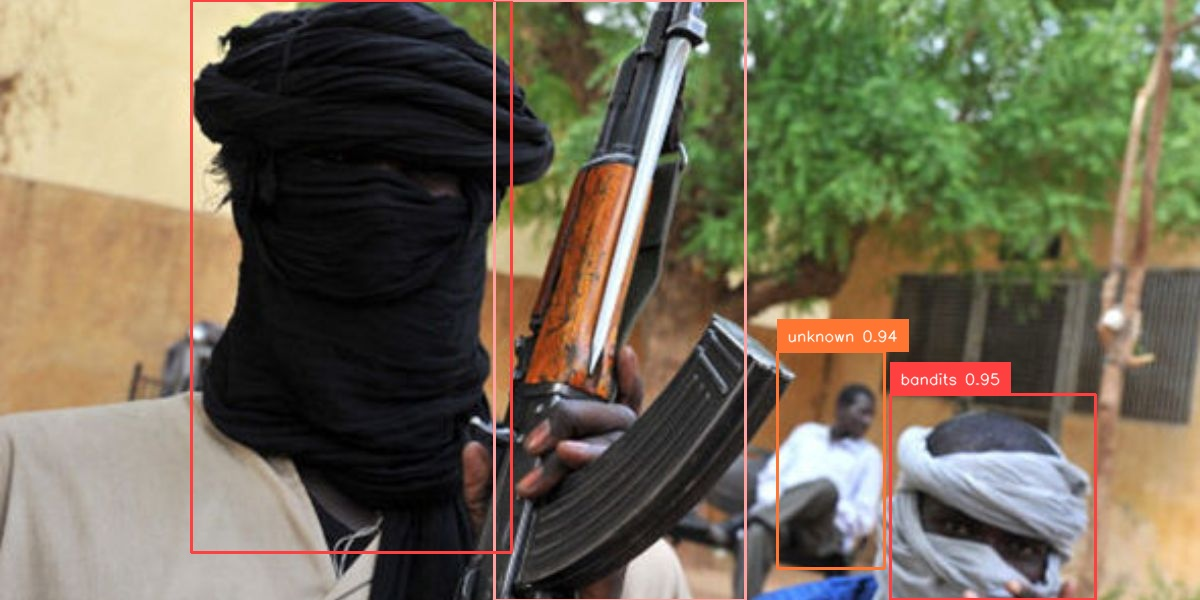

In [13]:
# Setting the path to the image 
imagePath = "annotatedImage.jpg" 

# Displaying the bandits image
Image(filename=imagePath, width=800)

In [14]:
# Box annotation 
image = cv2.imread(imagePath)

# Getting the results 
results = trainedModel(image)[0]

# 
detections = sv.Detections.from_ultralytics(results) 

# 
corner_annotator = sv.BoxCornerAnnotator() 
annotated_frame = corner_annotator.annotate(
    scene=image.copy(), 
    detections=detections
)

annotated_frame = label_annotator.annotate(
    scene=annotated_frame, detections=detections, labels=labels)


0: 320x640 2 banditss, 1 gun, 1 unknown, 209.0ms
Speed: 1.2ms preprocess, 209.0ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)


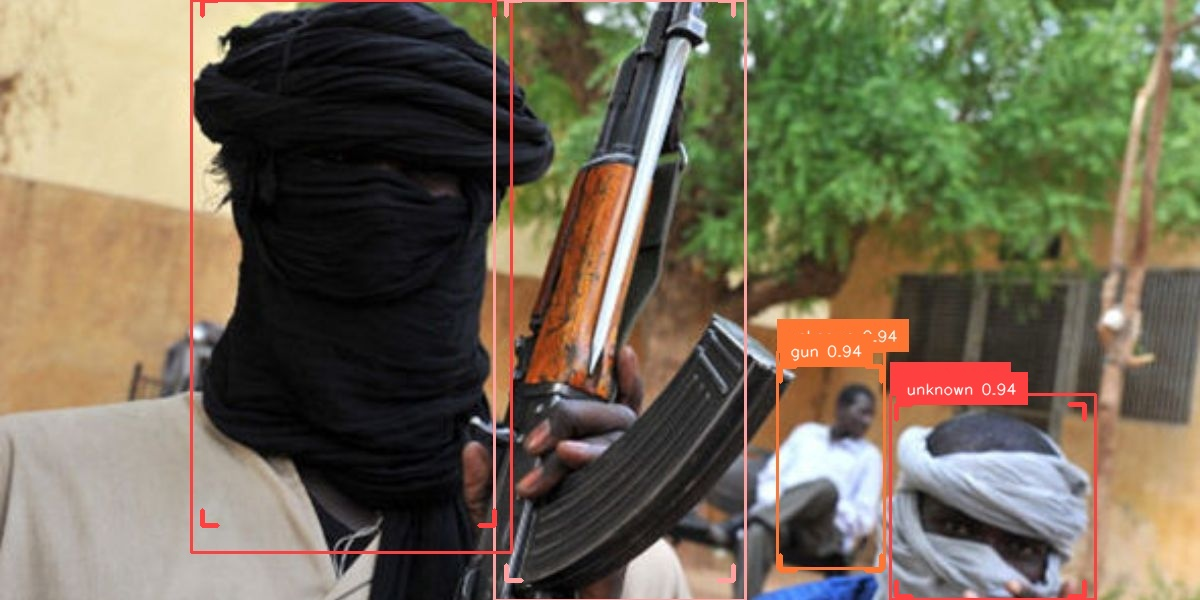

In [15]:
cv2.imwrite("boxImage.jpg", annotated_frame)

# Displaying the bandits image
Image(filename="boxImage.jpg", width=800)

In [16]:
# Predict the image 
results = trainedModel(imagePath)

# Extract boxes, confidences, and class IDs from first image result
boundingBoxes = results[0].boxes.xyxy.cpu().numpy()       # Bounding boxes in [x1, y1, x2, y2] format
confidenceScores = results[0].boxes.conf.cpu().numpy()    # Confidence scores
classIds = results[0].boxes.cls.cpu().numpy()             # Class indices

# Optional: class names
classNames = trainedModel.names  # Automatically gets class names from model

# Load original image using OpenCV
originalImage = cv2.imread(imagePath)

# Draw boxes manually
for box, score, classId in zip(boundingBoxes, confidenceScores, classIds):
    x1, y1, x2, y2 = map(int, box)
    label = f"{classNames[int(classId)]}: {score:.2f}"
    print(label)

    # cv2.rectangle(originalImage, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.rectangle(originalImage, (x1, y1), (x2, y2), (0, 255, 0), 1, lineType=cv2.LINE_AA)
    cv2.putText(originalImage, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 255, 255), 2)

# # Convert BGR (OpenCV) to RGB (matplotlib)
# imageRgb = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)

# # Display using matplotlib
# plt.figure(figsize=(10, 8))
# plt.imshow(imageRgb)
# plt.axis('off')
# plt.title("YOLOv8 Detection Result")
# plt.show()

# Save the image 
cv2.imwrite("analyzedImage.jpg", originalImage) 


image 1/1 /Users/mbonuchinedu/Documents/Projects/banditsProject/Test/annotatedImage.jpg: 320x640 2 banditss, 1 gun, 1 unknown, 204.8ms
Speed: 1.1ms preprocess, 204.8ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)
bandits: 0.95
bandits: 0.95
unknown: 0.93
gun: 0.93


True

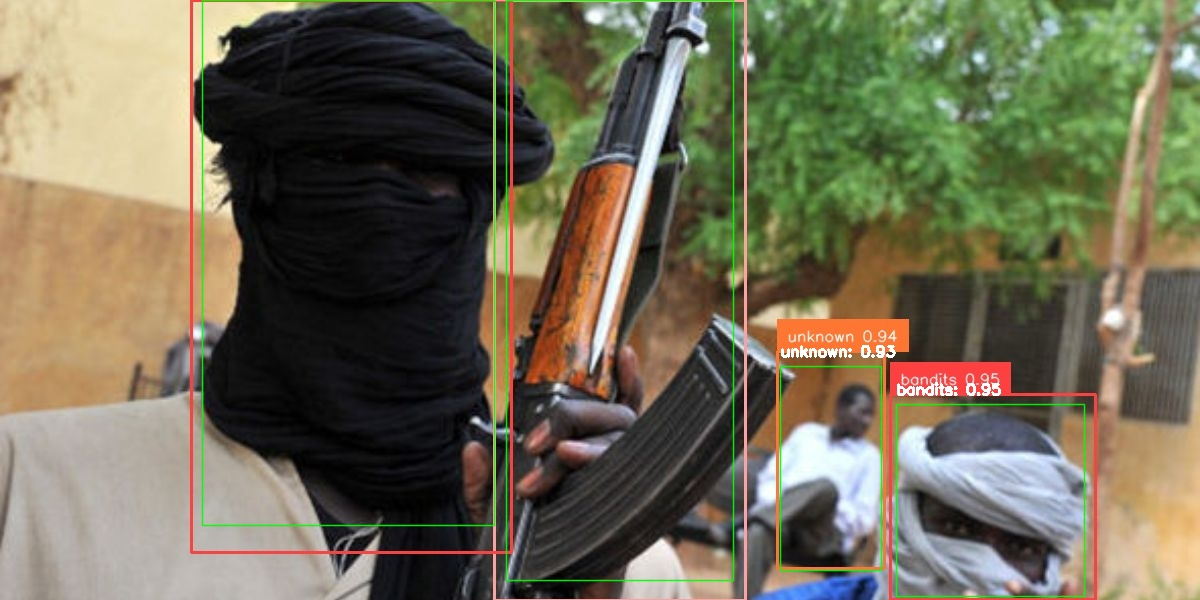

In [17]:
# Setting the path to the image 
imagePath = "analyzedImage.jpg" 

# Displaying the bandits image
Image(filename=imagePath, width=800)

<h2> Simulating Night Vision Imagery </h2>

In [2]:
# Importing the necessary modules 
import cv2 
import numpy as np 

# Creating the night vision function 
def simulateNightVision(imagePath): 
    # loading the image into memory 
    image = cv2.imread(imagePath) 

    # if the image is none 
    if image is None: 
        # Display an error message 
        print("Error: Could not read the image.")
        return 

    # Convert to gray scale 
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a green color map 
    nightVisionImage = cv2.applyColorMap(grayImage, cv2.COLORMAP_JET) 

    # Enhance constrast and brightness 
    alpha = 1.5 
    beta = 50 
    nightVisionImage = cv2.convertScaleAbs(nightVisionImage, alpha=alpha, beta=beta) 

    # Display the image 
    cv2.imshow("Orignal", image) 
    cv2.imshow("Simulated Night Vision", nightVisionImage) 
    cv2.imshow("Gray Imag", grayImage) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 

In [3]:
# Setting the path to the image 
imagePath = "images/train/img15.jpg"

# loading the image 
simulateNightVision(imagePath) 